# Object Detection using YOLOv3 and OpenCV

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [11]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
classes = []

with open('coco.names', 'r') as f:
    classes = f.read().splitlines()

print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


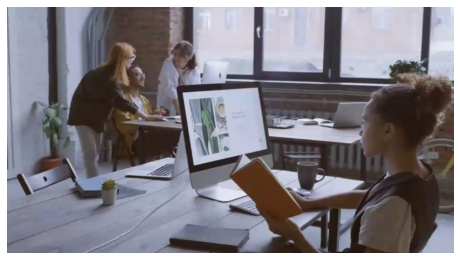

In [12]:
img = cv2.imread('image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, _ = img.shape

plt.figure(figsize = (8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

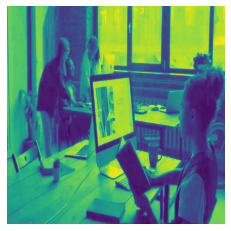

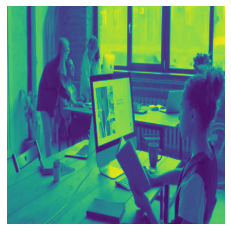

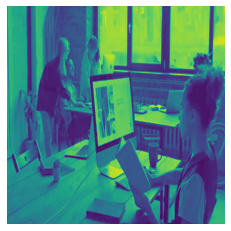

In [13]:
blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0, 0, 0), swapRB = True, crop = False)

for b in blob:
    for n, img_blob in enumerate(b):
        plt.imshow(img_blob)
        plt.axis('off')
        plt.show()

In [14]:
net.setInput(blob)

output_layers_names = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_names)

In [15]:
boxes = []
confidences = []
class_ids = []

for output in layerOutputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [16]:
print('Number of initially detected objects:', len(boxes))
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print('Number of detected objects after suppressing redundant boxes:', len(indexes.flatten()))
print('Indexes of final detected objects:', indexes.flatten())

Number of initially detected objects: 19
Number of detected objects after suppressing redundant boxes: 10
Indexes of final detected objects: [15  6  1 10  2  5  4 11 18 14]


In [17]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3))

for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i], 2))
    color = colors[i]
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label + ' ' + confidence, (x, y + 20), font, 2, (255, 255, 255), 2) 

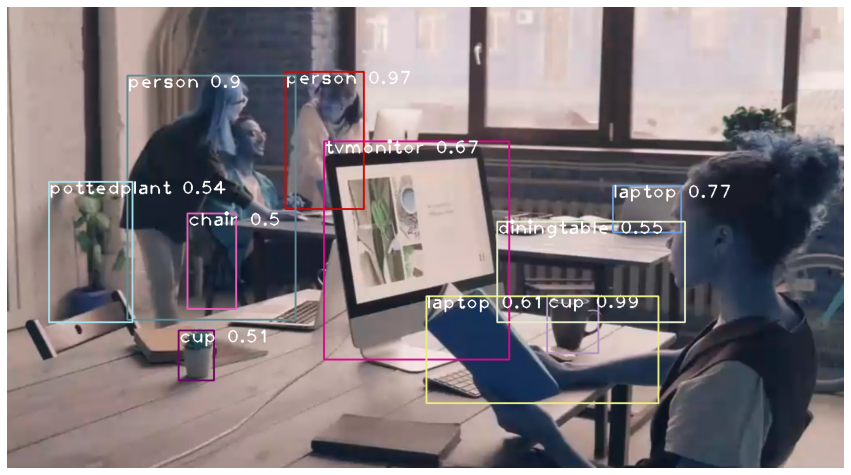

In [18]:
plt.figure(figsize = (15, 10))
plt.imshow(img[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

import cv2
import numpy as np

net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
classes = []

with open('coco.names', 'r') as f:
    classes = f.read().splitlines()

cap = cv2.VideoCapture(0)

while True:
    _, img = cap.read()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, _ = img.shape

    blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0, 0, 0), swapRB = True, crop = False)

    net.setInput(blob)
    output_layers_names = net.getUnconnectedOutLayersNames()
    layerOutputs = net.forward(output_layers_names)

    boxes = []
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)            

    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0, 255, size = (len(boxes), 3))

    if len(indexes) > 0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i], 2))
            color = colors[i]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label + ' ' + confidence, (x, y + 20), font, 2, (255, 255, 255), 2)

    cv2.imshow('Image', img)
    key = cv2.waitKey(1)
    if key == 27:
        break
cap.release()
cap.destroyAllWindows()